<a href="https://colab.research.google.com/github/OwenGN/TIM147/blob/main/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
df = pd.read_excel('Customer_Churn.xlsx')
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,149610,186,0,203399,445,15,1,very_unsat,avg,actively_looking_into_it,LEAVE
1,one,157766,85,0,497299,384,5,13,unsat,very_high,considering,STAY
2,one,157535,139,77,647260,226,22,1,very_unsat,very_little,considering,LEAVE
3,one,100800,215,0,188219,859,10,12,sat,avg,never_thought,LEAVE
4,one,87141,0,20,277228,250,1,4,very_unsat,avg,actively_looking_into_it,LEAVE


In [3]:
# Drop non-numeric columns
numeric_df = df
numeric_df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,zero,149610,186,0,203399,445,15,1,very_unsat,avg,actively_looking_into_it,LEAVE
1,one,157766,85,0,497299,384,5,13,unsat,very_high,considering,STAY
2,one,157535,139,77,647260,226,22,1,very_unsat,very_little,considering,LEAVE
3,one,100800,215,0,188219,859,10,12,sat,avg,never_thought,LEAVE
4,one,87141,0,20,277228,250,1,4,very_unsat,avg,actively_looking_into_it,LEAVE


In [4]:
#replace zero and one in COLLEGE
numeric_df['COLLEGE'] = numeric_df['COLLEGE'].replace({'zero':0, 'one':1})
numeric_df['REPORTED_SATISFACTION'] = numeric_df['REPORTED_SATISFACTION'].replace({'very_unsat':-2, 'unsat':-1, 'avg':0, 'sat':1, 'very_sat':2})
numeric_df['REPORTED_USAGE_LEVEL'] = numeric_df['REPORTED_USAGE_LEVEL'].replace({'very_little':-2, 'little':-1, 'avg':0, 'high':1, 'very_high':2})
numeric_df['CONSIDERING_CHANGE_OF_PLAN'] = numeric_df['CONSIDERING_CHANGE_OF_PLAN'].replace({'actively_looking_into_it':-2, 'considering':-1, 'perhaps':0, 'no':1, 'never_thought':2})
numeric_df['LEAVE'] = numeric_df['LEAVE'].replace({'STAY':1, 'LEAVE':-1})
df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,0,149610,186,0,203399,445,15,1,-2,0,-2,-1
1,1,157766,85,0,497299,384,5,13,-1,2,-1,1
2,1,157535,139,77,647260,226,22,1,-2,-2,-1,-1
3,1,100800,215,0,188219,859,10,12,1,0,2,-1
4,1,87141,0,20,277228,250,1,4,-2,0,-2,-1


In [5]:
# Standardize the numeric features
scaler = StandardScaler()
scaled_array = scaler.fit_transform(numeric_df)
scaled_df = pd.DataFrame(data=scaled_array, columns=numeric_df.columns)
scaled_df.head()

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
0,-1.004812,1.663371,1.163161,-0.891209,-1.147997,0.259031,0.784218,-1.136243,-0.961154,0.122337,-1.137888,-1.014911
1,0.995211,1.859055,-0.011391,-0.891209,0.016417,-0.026261,-0.336206,1.589514,-0.347429,1.445263,-0.382318,0.985308
2,0.995211,1.853512,0.616587,1.980213,0.610554,-0.765217,1.568515,-1.136243,-0.961154,-1.200588,-0.382318,-1.014911
3,0.995211,0.492293,1.500409,-0.891209,-1.208139,2.195282,0.224006,1.362367,0.880019,0.122337,1.884391,-1.014911
4,0.995211,0.164578,-0.999876,-0.145385,-0.855491,-0.652970,-0.784375,-0.454804,-0.961154,0.122337,-1.137888,-1.014911


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

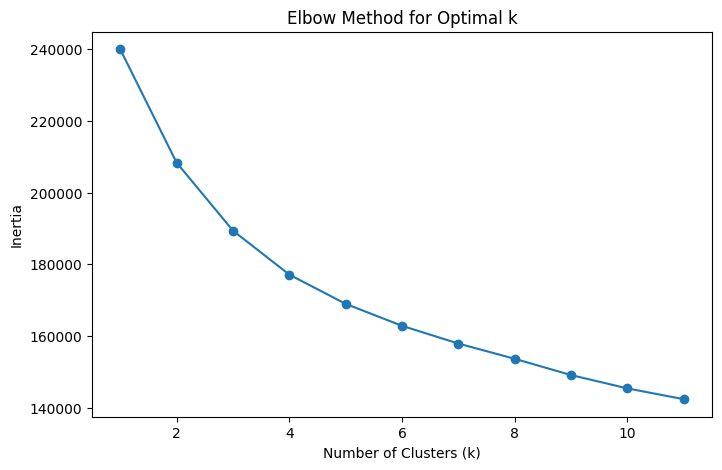

In [6]:
# Determine the optimal number of clusters (k) using the elbow method
inertia = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_array)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 5))
plt.plot(range(1, 12), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [7]:
chosen_k = 3

# Apply K-means clustering with the chosen k
kmeans = KMeans(n_clusters=chosen_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_array)
scaled_df['Cluster'] = kmeans.fit_predict(scaled_array)
scaled_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE,Cluster
0,-1.004812,1.663371,1.163161,-0.891209,-1.147997,0.259031,0.784218,-1.136243,-0.961154,0.122337,-1.137888,-1.014911,1
1,0.995211,1.859055,-0.011391,-0.891209,0.016417,-0.026261,-0.336206,1.589514,-0.347429,1.445263,-0.382318,0.985308,0
2,0.995211,1.853512,0.616587,1.980213,0.610554,-0.765217,1.568515,-1.136243,-0.961154,-1.200588,-0.382318,-1.014911,1
3,0.995211,0.492293,1.500409,-0.891209,-1.208139,2.195282,0.224006,1.362367,0.880019,0.122337,1.884391,-1.014911,0
4,0.995211,0.164578,-0.999876,-0.145385,-0.855491,-0.652970,-0.784375,-0.454804,-0.961154,0.122337,-1.137888,-1.014911,2


In [13]:
centroids = scaled_df.groupby('Cluster').mean()
centroids

,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,LEAVE
Cluster,,,,,,,,,,,,
0,0.012286,1.149840,-0.472882,0.017879,-0.015424,1.223520,-0.496195,-0.036626,0.016364,-0.005036,-0.000661,0.009121
1,-0.006276,-0.079529,1.279198,-0.019102,-0.010729,-0.114108,1.282648,0.021730,-0.030250,0.004518,-0.025787,-0.350577
2,-0.002560,-0.586420,-0.610068,0.003082,0.015922,-0.603864,-0.599432,0.005570,0.011539,-0.000279,0.017978,0.234330


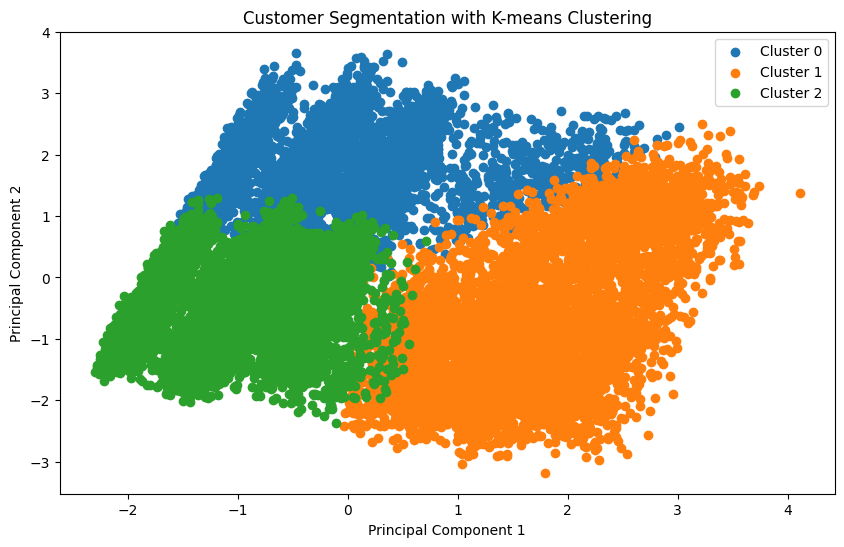

In [8]:
# Visualize the clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_array)
cluster_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
cluster_df['Cluster'] = scaled_df['Cluster']

# Plot clusters in 2D space
plt.figure(figsize=(10, 6))
for cluster in range(chosen_k):
    plt.scatter(cluster_df.loc[cluster_df['Cluster'] == cluster, 'PC1'],
                cluster_df.loc[cluster_df['Cluster'] == cluster, 'PC2'],
                label=f'Cluster {cluster}')
plt.title('Customer Segmentation with K-means Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


In [9]:
#numeric_df['COLLEGE'] = numeric_df['COLLEGE'].replace({0: 'zero', 1: 'one'})
#numeric_df['REPORTED_SATISFACTION'] = numeric_df['REPORTED_SATISFACTION'].replace({-2: 'very_unsat', -1: 'unsat', 0: 'avg', 1: 'sat', 2: 'very_sat'})
#numeric_df['REPORTED_USAGE_LEVEL'] = numeric_df['REPORTED_USAGE_LEVEL'].replace({-2: 'very_little', -1: 'little', 0: 'avg', 1: 'high', 2: 'very_high'})
#numeric_df['CONSIDERING_CHANGE_OF_PLAN'] = numeric_df['CONSIDERING_CHANGE_OF_PLAN'].replace({-2: 'actively_looking_into_it', -1: 'considering', 0: 'perhaps', 1: 'no', 2: 'never_thought'})
#numeric_df['LEAVE'] = numeric_df['LEAVE'].replace({1: 'STAY', -1: 'LEAVE'})
#f.head()

In [15]:
C0_df = df[df['Cluster'] == 0]
C1_df = df[df['Cluster'] == 1]
C2_df = df[df['Cluster'] == 2]
ave0 = C0_df.mean(axis=0)
ave1 = C1_df.mean(axis=0)
ave2 = C2_df.mean(axis=0)
ave0

COLLEGE                             0.508543
INCOME                         128206.237990
OVERAGE                            45.316382
LEFTOVER                           24.378090
HOUSE                          489262.245628
HANDSET_PRICE                     651.222513
OVER_15MINS_CALLS_PER_MONTH         3.572060
AVERAGE_CALL_DURATION               5.841005
REPORTED_SATISFACTION              -0.407236
REPORTED_USAGE_LEVEL               -0.192563
CONSIDERING_CHANGE_OF_PLAN         -0.494874
LEAVE                               0.023920
Cluster                             0.000000
dtype: float64

In [14]:
ave1

COLLEGE                             0.499262
INCOME                          76966.704445
OVERAGE                           195.978022
LEFTOVER                           23.386420
HOUSE                          490447.142857
HANDSET_PRICE                     365.217156
OVER_15MINS_CALLS_PER_MONTH        19.448581
AVERAGE_CALL_DURATION               6.097917
REPORTED_SATISFACTION              -0.483188
REPORTED_USAGE_LEVEL               -0.178120
CONSIDERING_CHANGE_OF_PLAN         -0.528129
LEAVE                              -0.335739
Cluster                             1.000000
dtype: float64

In [12]:
ave2

COLLEGE                             0.501120
INCOME                          55839.709229
OVERAGE                            33.519713
LEFTOVER                           23.981295
HOUSE                          497173.990031
HANDSET_PRICE                     260.499664
OVER_15MINS_CALLS_PER_MONTH         2.650650
AVERAGE_CALL_DURATION               6.026770
REPORTED_SATISFACTION              -0.415099
REPORTED_USAGE_LEVEL               -0.185372
CONSIDERING_CHANGE_OF_PLAN         -0.470206
LEAVE                               0.249104
Cluster                             2.000000
dtype: float64